# Capstone Project: PAK DE (Parkinson Detection)

Dataset yang digunakan adalah 2 dataset yang digabungkan, dimana ada 3 jenis kelas setelah dilakukan penggabungan dataset yaitu `spiral`, `wave`, dan `meander`.


**Source:** [HandPD dataset](https://wwwp.fc.unesp.br/~papa/pub/datasets/Handpd/) dan [Hand Drawings](https://data.mendeley.com/datasets/fd5wd6wmdj/1)

## Install Module

In [1]:
%pip install tensorflow

In [2]:
%pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.3 MB/s eta 0:00:00


## Import Library

In [3]:
# --- Libraries untuk Operasi Dasar dan Sistem File ---
import os  # Untuk berinteraksi dengan sistem operasi, seperti path, direktori
import pathlib  # Untuk bekerja dengan path file dan direktori secara object-oriented (tidak digunakan secara eksplisit di kode yang Anda berikan, tapi umum)
import random  # Untuk menghasilkan angka acak (tidak digunakan secara eksplisit, tapi bisa berguna)
import shutil  # Untuk operasi file tingkat tinggi seperti menyalin dan menghapus folder
import zipfile # Untuk bekerja dengan file ZIP (tidak digunakan secara eksplisit karena Anda menggunakan !unzip)

# --- Libraries untuk Manipulasi Data dan Numerik ---
import numpy as np  # Fundamental package untuk komputasi numerik, terutama array multidimensi
import pandas as pd  # Untuk analisis dan manipulasi data, terutama struktur data seperti DataFrame
from tqdm.notebook import tqdm as tq  # Untuk menampilkan progress bar yang interaktif di notebook Jupyter/Colab

# --- Libraries Spesifik Google Colab ---
# from google.colab import files # Untuk upload/download file di Colab (tidak digunakan di kode terakhir)
from google.colab import drive # Untuk me-mount Google Drive di Colab

# --- Libraries untuk Visualisasi Data ---
# %matplotlib inline # Magic command Jupyter untuk menampilkan plot matplotlib secara inline
import matplotlib.pyplot as plt  # Library utama untuk membuat plot dan visualisasi statis, animasi, dan interaktif
import seaborn as sns  # Library visualisasi data berbasis matplotlib, menyediakan antarmuka tingkat tinggi untuk grafik statistik yang menarik

# --- Libraries untuk Pemrosesan Gambar dan Machine Learning ---
from PIL import Image  # Python Imaging Library (Pillow fork) untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar
from collections import Counter # Untuk menghitung frekuensi item dalam sebuah list (digunakan untuk mengecek channel warna)

# --- TensorFlow dan Keras (untuk Deep Learning) ---
import tensorflow as tf  # Platform open-source end-to-end untuk machine learning
from tensorflow.keras.applications import MobileNetV2  # Model MobileNetV2 yang sudah terlatih (pre-trained) untuk transfer learning
from tensorflow.keras import layers, models, callbacks, optimizers  # Komponen-komponen untuk membangun dan melatih model Keras:
                                                                  # layers: Blok bangunan model (Dense, Dropout, Conv2D, dll.)
                                                                  # models: API untuk membuat model (Sequential, Functional)
                                                                  # callbacks: Fungsi yang dipanggil selama pelatihan (EarlyStopping, ReduceLROnPlateau)
                                                                  # optimizers: Algoritma untuk mengoptimalkan model (Adam, SGD)
from tensorflow.keras.regularizers import l2  # Untuk menerapkan regularisasi L2 (weight decay) pada bobot layer
from tensorflow.keras.preprocessing import image # Utilitas untuk preprocessing gambar sebelum dimasukkan ke model Keras (misalnya, load_img, img_to_array)

# --- Scikit-learn (untuk utilitas Machine Learning) ---
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi set latih dan tes (atau validasi)
from sklearn.utils import class_weight  # Untuk menghitung bobot kelas guna menangani dataset yang tidak seimbang
from sklearn.metrics import confusion_matrix, classification_report  # Untuk mengevaluasi performa model klasifikasi

# --- MLflow (untuk Manajemen Eksperimen Machine Learning) ---
import mlflow  # Platform open-source untuk mengelola siklus hidup machine learning, termasuk pelacakan eksperimen
import mlflow.tensorflow  # Modul MLflow untuk integrasi dengan TensorFlow/Keras

# --- Lain-lain ---
import tempfile  # Untuk membuat file dan direktori sementara

# --- Mengabaikan Peringatan untuk output yang lebih bersih ---
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Tahap 1: Konfigurasi Dasar dan Pemuatan Data Awal

In [4]:
# Mount Google Drive (hanya jika menggunakan Colab)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Konfigurasi Dasar

In [5]:
# Konfigurasi Dasar
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

### Data Loading

In [6]:
# Path ke folder dataset di Google Drive
drive_path = '/content/drive/MyDrive/'
project_folder = 'parkinson' # Nama folder proyek di Drive
dataset_name_zip = 'parkinson_dataset.zip' # Nama file zip
extracted_dataset_folder_name = 'parkinson_dataset' # Nama folder setelah diekstrak

dataset_base_path = os.path.join(drive_path, project_folder)
zip_file_path = os.path.join(dataset_base_path, dataset_name_zip)
dataset_dir = os.path.join(dataset_base_path, extracted_dataset_folder_name) # Path ke folder dataset yang sudah diekstrak
base_path_split = os.path.join(dataset_base_path, 'split_data') # Path untuk menyimpan data yang sudah di-split

In [ ]:
# Direktori tujuan untuk mengesktrak isi zip
if not os.path.exists(dataset_dir):
    print(f"Mengekstrak: '{zip_file_path}' ke '{dataset_base_path}'")
    if os.path.exists(zip_file_path):
        # Perintah unzip untuk Colab
        !unzip -q "{zip_file_path}" -d "{dataset_base_path}"
        print(f"File '{dataset_name_zip}' berhasil diekstrak ke: {dataset_base_path}")
    else:
        print(f"File ZIP '{dataset_name_zip}' tidak ditemukan di: {zip_file_path}")
else:
    print(f"Folder dataset '{dataset_dir}' sudah ada.")

Folder dataset '/content/drive/MyDrive/parkinson/parkinson_dataset' sudah ada.


### 1.1. Mengumpulkan Path Gambar dan Label Awal untuk EDA

In [7]:
all_file_paths_eda = []
all_labels_initial_eda = []
all_labels_main_eda = []
image_modes_eda = []
image_sizes_eda = {}

sub_folders = ['meander', 'spiral', 'wave']
categories = ['healthy', 'parkinson']

for sub_folder in sub_folders:
    image_sizes_eda[sub_folder] = {'healthy': [], 'parkinson': []}
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and not filename.startswith('.'): # Hindari file tersembunyi
                    img_path = os.path.join(folder_path, filename)
                    all_file_paths_eda.append(img_path)
                    all_labels_initial_eda.append(f"{category} ({sub_folder})")
                    all_labels_main_eda.append(category)
                    try:
                        with Image.open(img_path) as img:
                            image_modes_eda.append(img.mode)
                            image_sizes_eda[sub_folder][category].append(img.size)
                    except Exception as e:
                        print(f"Gagal membaca info gambar {img_path}: {e}")
        else:
            print(f"Folder tidak ditemukan atau bukan direktori: {folder_path}")

if not all_file_paths_eda:
    raise ValueError("Tidak ada file gambar yang ditemukan untuk EDA. Periksa path dataset_dir dan struktur folder.")

df_eda = pd.DataFrame({
    "path": all_file_paths_eda,
    "labels_initial": all_labels_initial_eda,
    "labels_main": all_labels_main_eda
})
print(f"Total gambar ditemukan untuk EDA: {len(df_eda)}")

Total gambar ditemukan untuk EDA: 940


## Tahap 2: Exploratory Data Analysis (EDA)

Pada tahapan ini dilakukan untuk memahami isi dan kualitas dataset sebelum diproses.

### EDA 2.1. Sampel Gambar untuk Semua Kelas dan Jenis

Untuk memahami seperti apa variasi visual dari tiap kelas  (healthy vs parkinson) dalam jenis gambar (spiral, wave, meander).

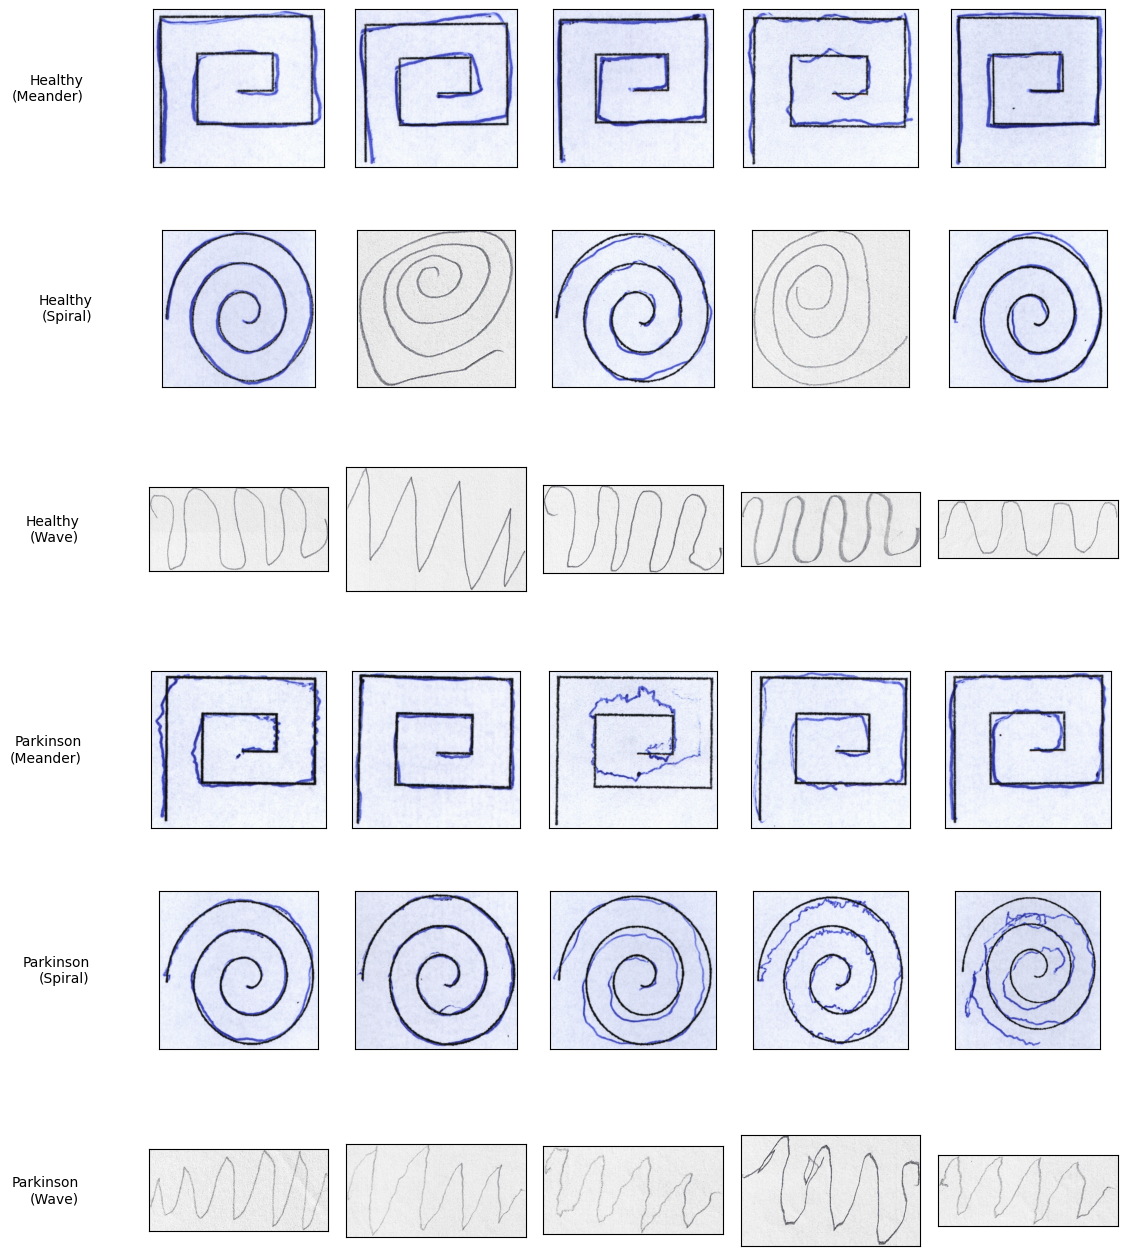

In [8]:
num_samples_to_display = 5
all_images_by_category_plot = {}
for sub_folder in sub_folders:
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            image_files = [
                f for f in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]
            if image_files:
                key_name = f"{category.capitalize()}\n({sub_folder.capitalize()})"
                all_images_by_category_plot[key_name] = [os.path.join(folder_path, fname) for fname in image_files]

sorted_categories_plot = sorted(all_images_by_category_plot.keys())
num_categories_to_plot = len(sorted_categories_plot)

if num_categories_to_plot > 0:
    fig, axs = plt.subplots(num_categories_to_plot, num_samples_to_display,
                            figsize=(num_samples_to_display * 2.5, num_categories_to_plot * 2.5))
    if num_categories_to_plot == 1: axs = np.array([axs])
    if num_samples_to_display == 1 and num_categories_to_plot > 1: axs = axs.reshape(-1, 1)
    elif num_samples_to_display == 1 and num_categories_to_plot == 1: axs = np.array([[axs]])

    for i, category_name in enumerate(sorted_categories_plot):
        image_paths_list = all_images_by_category_plot[category_name]
        if image_paths_list:
            selected_image_paths = np.random.choice(image_paths_list,
                                                    min(num_samples_to_display, len(image_paths_list)),
                                                    replace=False)
            if num_samples_to_display > 0 :
                axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display):
                if j < len(selected_image_paths):
                    img_path_plot = selected_image_paths[j]
                    try:
                        img_plot = Image.open(img_path_plot).convert('RGB')
                        axs[i, j].imshow(img_plot)
                    except Exception: axs[i, j].set_title("Error", fontsize=8)
                else: axs[i,j].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=10)
                axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
        else:
            if num_samples_to_display > 0: axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display): axs[i,j].text(0.5, 0.5, 'No Images', ha='center', va='center', fontsize=10); axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
    plt.subplots_adjust(hspace=0.4, wspace=0.1, top=0.95); plt.show()
else:
    print("Tidak ada data gambar untuk sampel EDA.")

### EDA 2.2. Distribusi Gambar per Kelas Utama (Healthy vs Parkinson)

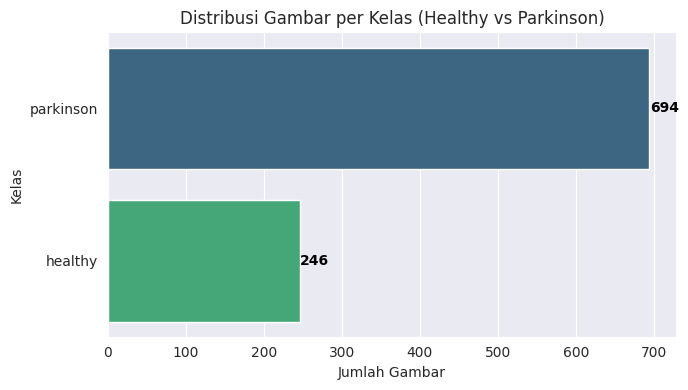


Jumlah Gambar per Kelas (Healthy vs Parkinson):
 labels_main
parkinson    694
healthy      246
Name: count, dtype: int64


In [9]:
label_counts_main_eda = df_eda['labels_main'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")
ax = sns.countplot(y='labels_main', data=df_eda, order=label_counts_main_eda.index, palette="viridis")
plt.title('Distribusi Gambar per Kelas (Healthy vs Parkinson)')
plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas')
for i, v in enumerate(label_counts_main_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
plt.tight_layout(); plt.show()
print("\nJumlah Gambar per Kelas (Healthy vs Parkinson):\n", label_counts_main_eda)

### EDA 2.3. Distribusi Gambar per Kelas dan Jenis

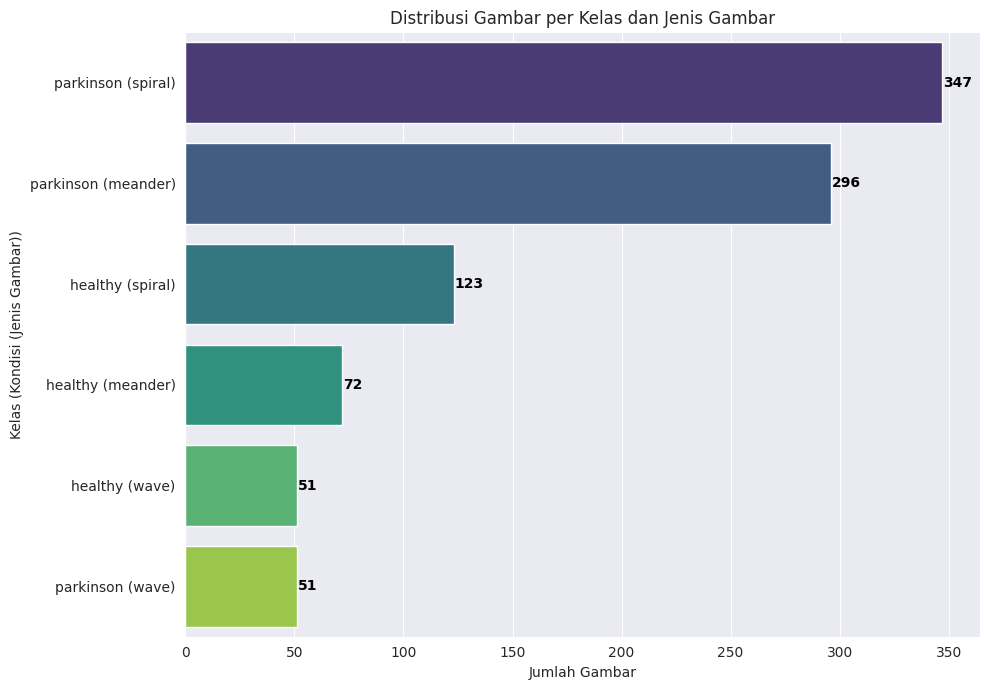


Jumlah Gambar per Kelas dan Jenis:
 labels_initial
parkinson (spiral)     347
parkinson (meander)    296
healthy (spiral)       123
healthy (meander)       72
healthy (wave)          51
parkinson (wave)        51
Name: count, dtype: int64


In [10]:
label_counts_detailed_eda = df_eda['labels_initial'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 7))
n_labels_detailed_eda = len(label_counts_detailed_eda)
if n_labels_detailed_eda > 0:
    palette_detailed_eda = sns.color_palette("viridis", n_colors=n_labels_detailed_eda)
    sns.set_style("darkgrid")
    ax = sns.countplot(y='labels_initial', data=df_eda, order=label_counts_detailed_eda.index, palette=palette_detailed_eda)
    plt.title('Distribusi Gambar per Kelas dan Jenis Gambar')
    plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas (Kondisi (Jenis Gambar))')
    for i, v in enumerate(label_counts_detailed_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
    plt.tight_layout(); plt.show()
    print("\nJumlah Gambar per Kelas dan Jenis:\n", label_counts_detailed_eda)
else:
    print("Tidak ada label_initial di df_eda.")

### EDA 2.4. Pengecekan Ukuran Gambar

In [11]:
for sub_folder_key, categories_data in image_sizes_eda.items():
    for category_key, sizes_list in categories_data.items():
        if sizes_list:
            unique_sizes = set(sizes_list)
            print(f"Ukuran gambar unik untuk ('{sub_folder_key}', '{category_key}'): {len(unique_sizes)}")
            if len(unique_sizes) < 10: print(f"   Contoh ukuran: {list(unique_sizes)[:5]}")
        else:
            print(f"Tidak ada ukuran gambar untuk ('{sub_folder_key}', '{category_key}')")

Ukuran gambar unik untuk ('meander', 'healthy'): 70
Ukuran gambar unik untuk ('meander', 'parkinson'): 280
Ukuran gambar unik untuk ('spiral', 'healthy'): 72
Ukuran gambar unik untuk ('spiral', 'parkinson'): 256
Ukuran gambar unik untuk ('wave', 'healthy'): 31
Ukuran gambar unik untuk ('wave', 'parkinson'): 43


### 2.5. Pengecekan Format Warna

In [12]:
mode_counts_original = Counter(image_modes_eda)
print("Distribusi mode gambar asli dalam dataset:", mode_counts_original)
if 'RGBA' in mode_counts_original or 'P' in mode_counts_original or 'L' in mode_counts_original:
    print("Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.")

Distribusi mode gambar asli dalam dataset: Counter({'RGB': 931, 'RGBA': 9})
Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.


## Tahap 3: Preprocessing Data untuk Model

### 3.1. Pembagian Data (Menggunakan DataFrame dari EDA)

In [13]:
labels_for_split = df_eda['labels_main']
main_df, test_df = train_test_split(df_eda, test_size=0.1, stratify=labels_for_split, random_state=SEED)
train_labels_for_stratify_val = main_df['labels_main']
train_df, val_df = train_test_split(main_df, test_size=0.2, stratify=train_labels_for_stratify_val, random_state=SEED)
print(f"Data latih (df): {len(train_df)}, Validasi (df): {len(val_df)}, Tes (df): {len(test_df)}")

Data latih (df): 676, Validasi (df): 170, Tes (df): 94


### 3.2. Menyalin Gambar ke Folder Split

In [14]:
if os.path.exists(base_path_split):
    print(f"Menghapus folder split_data lama: {base_path_split}")
    shutil.rmtree(base_path_split)
os.makedirs(base_path_split, exist_ok=True)

def copy_images_for_tf_dataset(df_to_copy, split_name_arg, base_path_split_arg): # Ganti nama parameter df
    print(f"Menyalin gambar untuk set {split_name_arg}...")
    for _, row in df_to_copy.iterrows():
        label_folder = row['labels_main']
        dst_dir = os.path.join(base_path_split_arg, split_name_arg, label_folder)
        os.makedirs(dst_dir, exist_ok=True)
        try:
            shutil.copy(row['path'], os.path.join(dst_dir, os.path.basename(row['path'])))
        except Exception as e:
            print(f"Error menyalin {row['path']} ke {dst_dir}: {e}")
    print(f"Selesai menyalin untuk set {split_name_arg}.")

copy_images_for_tf_dataset(train_df, "train", base_path_split)
copy_images_for_tf_dataset(val_df, "val", base_path_split)
copy_images_for_tf_dataset(test_df, "test", base_path_split)

Menghapus folder split_data lama: /content/drive/MyDrive/parkinson/split_data
Menyalin gambar untuk set train...
Selesai menyalin untuk set train.
Menyalin gambar untuk set val...
Selesai menyalin untuk set val.
Menyalin gambar untuk set test...
Selesai menyalin untuk set test.


### 3.3. Load Dataset dengan `tf.data.image_dataset_from_directory`

In [15]:
train_path = os.path.join(base_path_split, 'train')
val_path = os.path.join(base_path_split, 'val')
test_path = os.path.join(base_path_split, 'test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=True, color_mode='rgb'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
class_names_from_tf = train_ds.class_names
print(f"Nama kelas ditemukan oleh TensorFlow: {class_names_from_tf}")

Found 676 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 94 files belonging to 2 classes.
Nama kelas ditemukan oleh TensorFlow: ['healthy', 'parkinson']


### 3.4. Hitung Class Weight

In [16]:
train_labels_for_weights = np.concatenate([y for x, y in train_ds], axis=0)
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(train_labels_for_weights), y=train_labels_for_weights
)
class_map = {name: i for i, name in enumerate(class_names_from_tf)}
class_weight_dict = {
    class_map.get('healthy', 0): class_weights_values[class_map.get('healthy', 0)],
    class_map.get('parkinson', 1): class_weights_values[class_map.get('parkinson', 1)]
}
print(f"Class names dari train_ds: {class_names_from_tf} -> Mapping: {class_map}")
print("Calculated Class Weights:", class_weight_dict)

Class names dari train_ds: ['healthy', 'parkinson'] -> Mapping: {'healthy': 0, 'parkinson': 1}
Calculated Class Weights: {0: np.float64(1.9096045197740112), 1: np.float64(0.6773547094188377)}


### 3.5. Augmentasi Data dan Preprocessing Pipeline untuk Model

In [17]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1)
    ], name="data_augmentation"
)

def apply_augmentation(image, label):
    image = tf.cast(image, tf.float32)
    image = data_augmentation(image, training=True)
    return image, label

def apply_preprocess_for_mobilenetv2(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

train_ds_final = train_ds.map(apply_augmentation, num_parallel_calls=AUTOTUNE)
train_ds_final = train_ds_final.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
val_ds_final = val_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
test_ds_final = test_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)

train_ds_final = train_ds_final.prefetch(buffer_size=AUTOTUNE)
val_ds_final = val_ds_final.prefetch(buffer_size=AUTOTUNE)
test_ds_final = test_ds_final.prefetch(buffer_size=AUTOTUNE)

#### Verifikasi Pipeline

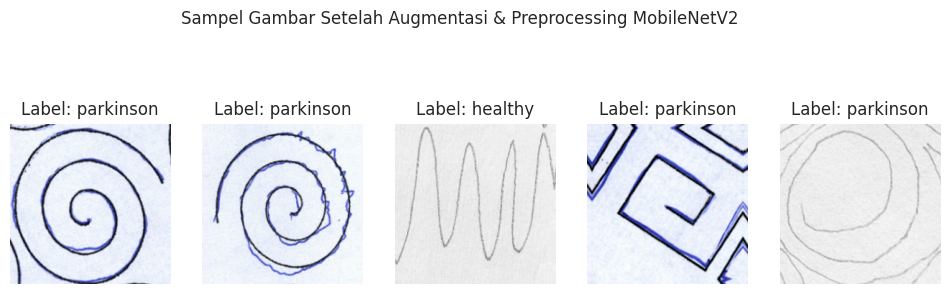

In [18]:
for images, labels in train_ds_final.take(1):
    plt.figure(figsize=(12, 4))
    for i in range(min(5, BATCH_SIZE)):
        ax = plt.subplot(1, 5, i + 1)
        img_display = (images[i].numpy() + 1.0) / 2.0
        img_display = np.clip(img_display, 0, 1)
        plt.imshow(img_display)
        plt.title(f'Label: {class_names_from_tf[labels[i].numpy()]}')
        plt.axis('off')
    plt.suptitle("Sampel Gambar Setelah Augmentasi & Preprocessing MobileNetV2")
    plt.show()
    break

## Tahap 4: Pemodelan dan Pelatihan

In [19]:
param_sets = [
    {
        "run_name": "LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore",
        "initial_lr": 5e-4, "dense_units": 64, "dropout_1": 0.4, "dropout_2": 0.3, "l2_reg": 0.002,
        "epochs": 60, "patience_early_stop": 15, "patience_reduce_lr": 5
    },
]

# Pastikan direktori MLflow ada jika logging lokal (Colab biasanya sudah handle ini)
os.makedirs("./mlruns", exist_ok=True)

best_run_id_overall_loop = None # Untuk menyimpan ID run MLflow terbaik dari loop ini
best_test_accuracy_loop = 0.0   # Inisialisasi dengan 0.0
model_best_in_loop = None       # Untuk menyimpan objek model Keras terbaik dari loop ini

for params in param_sets:
    # Tentukan nama eksperimen di MLflow
    mlflow.set_experiment("Parkinson_Detection_Capstone_Final_Runs") # Sesuaikan nama eksperimen

    with mlflow.start_run(run_name=params["run_name"]) as run: # 'run' terdefinisi di sini
        current_run_id = run.info.run_id # Dapatkan run_id saat ini
        print(f"\n--- Memulai Run MLflow: {params['run_name']} (ID: {current_run_id}) ---")

        # Logging Parameter ke MLflow
        mlflow.log_params(params)
        mlflow.log_param("trainable_base", False)
        mlflow.log_param("batch_size", BATCH_SIZE)

        # Bangun Model
        base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
        base_model.trainable = False

        model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(params["dropout_1"]),
            layers.Dense(params["dense_units"], activation='relu', kernel_regularizer=l2(params["l2_reg"])),
            layers.BatchNormalization(),
            layers.Dropout(params.get("dropout_2", 0.0)), # Default 0.0 jika tidak ada dropout_2
            layers.Dense(1, activation='sigmoid')
        ], name=f"model_{params['run_name']}")

        # Kompilasi Model
        model.compile(optimizer=optimizers.Adam(learning_rate=params["initial_lr"]),
                      loss='binary_crossentropy',
                      metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        if params["run_name"] == param_sets[0]["run_name"]: # Hanya print summary untuk run pertama
            model.summary(print_fn=lambda x: print(x))

        print(f"--- Melatih model dengan konfigurasi: {params['run_name']} ---")
        # Callbacks
        early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=params["patience_early_stop"], restore_best_weights=True, verbose=1)
        reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=params["patience_reduce_lr"], min_lr=1e-7, verbose=1)

        # Pelatihan Model
        history = model.fit(
            train_ds_final,
            epochs=params["epochs"],
            validation_data=val_ds_final,
            class_weight=class_weight_dict, # Pastikan class_weight_dict sudah ada
            callbacks=[early_stop, reduce_lr],
            verbose=1
        )

        # Logging metrik per epoch ke MLflow
        actual_epochs_trained = len(history.history['loss'])
        mlflow.log_metric("actual_epochs_trained", actual_epochs_trained)
        for epoch_idx in range(actual_epochs_trained):
            for metric_name_hist in history.history.keys():
                 mlflow.log_metric(f"{metric_name_hist}_epoch", history.history.get(metric_name_hist, [np.nan]*actual_epochs_trained)[epoch_idx], step=epoch_idx + 1)

        # Evaluasi pada Test Set
        print(f"--- Mengevaluasi {params['run_name']} pada Test Set ---")
        results = model.evaluate(test_ds_final, verbose=0) # results adalah list [loss, accuracy, precision, recall]

        # Ekstrak metrik dari hasil evaluasi
        test_loss_val = results[0]
        current_test_accuracy = results[1] # Indeks 1 untuk 'accuracy'
        test_precision_val = results[2]    # Indeks 2 untuk 'precision'
        test_recall_val = results[3]       # Indeks 3 untuk 'recall'

        print(f"Test Loss: {test_loss_val:.4f}")
        print(f"Test Accuracy: {current_test_accuracy:.4f}")
        print(f"Test Precision: {test_precision_val:.4f}")
        print(f"Test Recall: {test_recall_val:.4f}")

        # Log metrik ini ke MLflow
        mlflow.log_metric("test_loss_final", test_loss_val)
        mlflow.log_metric("test_accuracy_final", current_test_accuracy)
        mlflow.log_metric("test_precision_final", test_precision_val)
        mlflow.log_metric("test_recall_final", test_recall_val)


        # Update model terbaik dari loop ini
        if current_test_accuracy > best_test_accuracy_loop:
            best_test_accuracy_loop = current_test_accuracy
            best_run_id_overall_loop = current_run_id
            model_best_in_loop = model # Simpan objek model Keras ini
            print(f"Model terbaik BARU DARI LOOP INI! Run: {params['run_name']}, Akurasi Tes: {best_test_accuracy_loop:.4f}")

        # Prediksi untuk Classification Report dan Confusion Matrix
        y_true_list, y_pred_probs_list = [], []
        for img_batch, label_batch in test_ds_final:
            preds = model.predict(img_batch, verbose=0)
            y_true_list.extend(label_batch.numpy()); y_pred_probs_list.extend(preds.flatten())
        y_pred_final = (np.array(y_pred_probs_list) > 0.5).astype("int32")

        # Membuat Visualisasi Ringkasan
        print(f"--- Membuat Visualisasi Ringkasan untuk {params['run_name']} ---")
        history_data_run = history.history
        cm_run = confusion_matrix(y_true_list, y_pred_final)

        fig_summary, axes_summary = plt.subplots(1, 3, figsize=(20, 5))
        fig_summary.suptitle(f'Ringkasan Performa Model - {params["run_name"]}', fontsize=16)

        # Subplot 1: Akurasi
        if 'accuracy' in history_data_run and 'val_accuracy' in history_data_run:
            axes_summary[0].plot(history_data_run['accuracy'], label='Train Accuracy', color='royalblue', marker='o', linestyle='-', markersize=4)
            axes_summary[0].plot(history_data_run['val_accuracy'], label='Val Accuracy', color='darkorange', marker='x', linestyle='--', markersize=5)
            axes_summary[0].set_title('Model Accuracy vs. Epoch'); axes_summary[0].set_xlabel('Epoch'); axes_summary[0].set_ylabel('Accuracy')
            axes_summary[0].legend(); axes_summary[0].grid(True, linestyle='--', alpha=0.7)
        else:
            axes_summary[0].text(0.5, 0.5, 'Data Akurasi Tidak Tersedia', ha='center', va='center'); axes_summary[0].set_title('Model Accuracy'); axes_summary[0].axis('off')

        # Subplot 2: Loss
        if 'loss' in history_data_run and 'val_loss' in history_data_run:
            axes_summary[1].plot(history_data_run['loss'], label='Train Loss', color='royalblue', marker='o', linestyle='-', markersize=4)
            axes_summary[1].plot(history_data_run['val_loss'], label='Val Loss', color='darkorange', marker='x', linestyle='--', markersize=5)
            axes_summary[1].set_title('Model Loss vs. Epoch'); axes_summary[1].set_xlabel('Epoch'); axes_summary[1].set_ylabel('Loss')
            axes_summary[1].legend(); axes_summary[1].grid(True, linestyle='--', alpha=0.7)
        else:
            axes_summary[1].text(0.5, 0.5, 'Data Loss Tidak Tersedia', ha='center', va='center'); axes_summary[1].set_title('Model Loss'); axes_summary[1].axis('off')

        # Subplot 3: Confusion Matrix
        # Pastikan class_names_from_tf sudah terdefinisi dengan benar (misal: ['healthy', 'parkinson'])
        sns.heatmap(cm_run, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names_from_tf, yticklabels=class_names_from_tf,
                    ax=axes_summary[2], cbar=True, annot_kws={"size": 12})
        axes_summary[2].set_xlabel("Predicted Label", fontsize=12); axes_summary[2].set_ylabel("True Label", fontsize=12)
        axes_summary[2].set_title("Confusion Matrix (Test Set)", fontsize=14)
        axes_summary[2].tick_params(axis='both', which='major', labelsize=10)

        plt.tight_layout(rect=[0, 0, 1, 0.93])
        # plt.show() # Komentari jika tidak ingin langsung tampil di notebook untuk setiap run

        temp_summary_plot_path = tempfile.mktemp(suffix=f"_{current_run_id}_summary_plot.png")
        fig_summary.savefig(temp_summary_plot_path)
        mlflow.log_artifact(temp_summary_plot_path, artifact_path="summary_plots_per_run")
        plt.close(fig_summary)
        print(f"Plot ringkasan untuk {params['run_name']} disimpan ke MLflow.")

        # Classification Report
        report_str = classification_report(y_true_list, y_pred_final, target_names=class_names_from_tf)
        report_dict = classification_report(y_true_list, y_pred_final, target_names=class_names_from_tf, output_dict=True)
        print(report_str)
        # Logging metrik dari classification report ke MLflow
        for class_label_report, metrics_val_report in report_dict.items():
            if isinstance(metrics_val_report, dict):
                for metric_label_report, value_report in metrics_val_report.items():
                    mlflow.log_metric(f"test_{class_label_report.replace(' ', '_')}_{metric_label_report.replace('-', '_')}", value_report)
            elif class_label_report != 'support':
                 mlflow.log_metric(f"test_{class_label_report.replace(' ', '_')}", metrics_val_report)

        temp_report_path = tempfile.mktemp(suffix=f"_{current_run_id}_report.txt")
        with open(temp_report_path, "w") as f: f.write(report_str)
        mlflow.log_artifact(temp_report_path)

        # Logging Model Keras ke MLflow
        mlflow.tensorflow.log_model(model, artifact_path="model")
        print(f"Run ID {current_run_id} untuk {params['run_name']} selesai di-log ke: {run.info.artifact_uri}")
        print(f"--- Selesai Run: {params['run_name']} --- \n")

# Bagian ini tetap di luar loop for params
print(f"\nMODEL TERBAIK DARI EKSEKUSI LOOP INI memiliki akurasi tes: {best_test_accuracy_loop:.4f} (Run ID MLflow: {best_run_id_overall_loop})")

2025/06/09 03:18:10 INFO mlflow.tracking.fluent: Experiment with name 'Parkinson_Detection_Capstone_Final_Runs' does not exist. Creating a new experiment.



--- Memulai Run MLflow: LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore (ID: 77444d97cfee47f0b883014ad8fd97a7) ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "model_LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├────────────

2025/06/09 03:29:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Plot ringkasan untuk LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore disimpan ke MLflow.
              precision    recall  f1-score   support

     healthy       0.76      0.88      0.81        25
   parkinson       0.95      0.90      0.93        69

    accuracy                           0.89        94
   macro avg       0.86      0.89      0.87        94
weighted avg       0.90      0.89      0.90        94



2025/06/09 03:29:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID 77444d97cfee47f0b883014ad8fd97a7 untuk LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore selesai di-log ke: file:///content/mlruns/970748290259013215/77444d97cfee47f0b883014ad8fd97a7/artifacts
--- Selesai Run: LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore --- 


MODEL TERBAIK DARI EKSEKUSI LOOP INI memiliki akurasi tes: 0.8936 (Run ID MLflow: 77444d97cfee47f0b883014ad8fd97a7)


#### Mencari Model Terbaik dari Semua Run di MLFLOW

In [20]:
EXPERIMENT_NAME_MLFLOW = "Parkinson_Detection_Capstone_Final_Runs" # Pastikan nama eksperimen sama
BEST_RUN_ID_FROM_MLFLOW_SEARCH = None # Variabel untuk ID dari MLflow search

try:
    experiment_mlflow = mlflow.get_experiment_by_name(EXPERIMENT_NAME_MLFLOW)
    if experiment_mlflow is None:
        print(f"Eksperimen '{EXPERIMENT_NAME_MLFLOW}' tidak ditemukan di MLflow.")
    else:
        experiment_id_mlflow = experiment_mlflow.experiment_id
        print(f"Mencari di Experiment ID MLflow: {experiment_id_mlflow}")

        METRIC_TO_SORT_BY_MLFLOW = 'metrics.test_accuracy_final' # Sesuai dengan yang Anda log
        # atau 'metrics.test_accuracy' jika itu yang Anda gunakan secara konsisten

        all_runs_df_mlflow = mlflow.search_runs(experiment_ids=[experiment_id_mlflow])

        if not all_runs_df_mlflow.empty:
            print(f"\nKolom yang tersedia dari MLflow untuk pencarian: {all_runs_df_mlflow.columns.tolist()}")

            if METRIC_TO_SORT_BY_MLFLOW in all_runs_df_mlflow.columns:
                all_runs_with_metric_mlflow = all_runs_df_mlflow.dropna(subset=[METRIC_TO_SORT_BY_MLFLOW])
                if not all_runs_with_metric_mlflow.empty:
                    all_runs_sorted_df_mlflow = all_runs_with_metric_mlflow.sort_values(by=METRIC_TO_SORT_BY_MLFLOW, ascending=False)
                    print("\n--- Ringkasan Beberapa Run Terbaik dari MLflow (Berdasarkan Akurasi Tes) ---")
                    display_cols_mlflow = [col for col in ['run_id', 'tags.mlflow.runName', METRIC_TO_SORT_BY_MLFLOW, 'params.initial_lr', 'params.dense_units'] if col in all_runs_sorted_df_mlflow.columns]
                    print(all_runs_sorted_df_mlflow[display_cols_mlflow].head())

                    best_run_overall_data_mlflow = all_runs_sorted_df_mlflow.iloc[0]
                    BEST_RUN_ID_FROM_MLFLOW_SEARCH = best_run_overall_data_mlflow['run_id']
                    best_run_name_overall_mlflow = best_run_overall_data_mlflow['tags.mlflow.runName']
                    best_test_accuracy_overall_mlflow = best_run_overall_data_mlflow[METRIC_TO_SORT_BY_MLFLOW]

                    print(f"\n--- Model TERBAIK dari SEMUA Eksperimen (Menurut MLflow) ---")
                    print(f"Run Name: {best_run_name_overall_mlflow}")
                    print(f"Run ID: {BEST_RUN_ID_FROM_MLFLOW_SEARCH}")
                    print(f"Test Accuracy: {best_test_accuracy_overall_mlflow:.4f}")
                else:
                    print(f"Tidak ada run dengan metrik '{METRIC_TO_SORT_BY_MLFLOW}' yang valid.")
            else:
                print(f"Peringatan: Metrik '{METRIC_TO_SORT_BY_MLFLOW}' tidak ada di MLflow. Tidak bisa memilih model terbaik berdasarkan metrik ini.")
        else:
            print(f"Tidak ada run di eksperimen '{EXPERIMENT_NAME_MLFLOW}'.")
except Exception as e_mlflow_search:
    print(f"Error saat mencari run di MLflow: {e_mlflow_search}")

print(f"\nRun ID yang akan digunakan untuk memuat model terbaik untuk Analisis Kesalahan: {BEST_RUN_ID_FROM_MLFLOW_SEARCH if BEST_RUN_ID_FROM_MLFLOW_SEARCH else best_run_id_overall_loop}")

Mencari di Experiment ID MLflow: 970748290259013215

Kolom yang tersedia dari MLflow untuk pencarian: ['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time', 'end_time', 'metrics.test_healthy_support', 'metrics.test_macro_avg_support', 'metrics.test_recall_final', 'metrics.test_weighted_avg_support', 'metrics.accuracy_epoch', 'metrics.test_macro_avg_precision', 'metrics.test_parkinson_support', 'metrics.test_healthy_recall', 'metrics.val_accuracy_epoch', 'metrics.learning_rate_epoch', 'metrics.val_precision_epoch', 'metrics.test_weighted_avg_f1_score', 'metrics.loss_epoch', 'metrics.actual_epochs_trained', 'metrics.test_healthy_f1_score', 'metrics.recall_epoch', 'metrics.test_macro_avg_f1_score', 'metrics.test_parkinson_f1_score', 'metrics.val_loss_epoch', 'metrics.test_macro_avg_recall', 'metrics.test_healthy_precision', 'metrics.test_precision_final', 'metrics.test_accuracy_final', 'metrics.test_loss_final', 'metrics.test_parkinson_recall', 'metrics.val_recall_epoch', 'me

#### TAHAP SEBELUM ANALISIS KESALAHAN: MEMUAT MODEL TERBAIK

In [21]:
# TAHAP SEBELUM ANALISIS KESALAHAN: MEMUAT MODEL TERBAIK DARI MLFLOW
model_for_final_analysis = None # Variabel yang akan digunakan di Tahap 5 & 6
is_pyfunc_model_for_final_analysis = False # Status pyfunc untuk model_for_final_analysis

# Tentukan run_id yang akan dimuat
run_id_to_load = None
if 'BEST_RUN_ID_FROM_MLFLOW_SEARCH' in locals() and BEST_RUN_ID_FROM_MLFLOW_SEARCH is not None:
    run_id_to_load = BEST_RUN_ID_FROM_MLFLOW_SEARCH
    print(f"Prioritas: Akan mencoba memuat model dari MLflow search (Run ID: {run_id_to_load}).")
elif 'best_run_id_overall_loop' in locals() and best_run_id_overall_loop is not None:
    run_id_to_load = best_run_id_overall_loop
    print(f"Fallback: Akan mencoba memuat model dari loop training terakhir (Run ID: {run_id_to_load}).")
else:
    print("Tidak ada Run ID yang valid (baik dari MLflow search maupun dari loop training terakhir).")

if run_id_to_load:
    try:
        logged_model_uri = f"runs:/{run_id_to_load}/model"
        print(f"\nMencoba memuat model sebagai 'pyfunc' dari MLflow run ID: {run_id_to_load} ({logged_model_uri})")
        model_for_final_analysis = mlflow.pyfunc.load_model(logged_model_uri) # Simpan ke variabel yang benar
        print("Model terbaik (sebagai pyfunc) berhasil dimuat.")
        # Heuristik untuk mengecek apakah ini pyfunc yang membungkus Keras atau pyfunc murni
        if not hasattr(model_for_final_analysis, 'layers') and hasattr(model_for_final_analysis, 'predict') and hasattr(model_for_final_analysis, 'metadata'):
            is_pyfunc_model_for_final_analysis = True; print("Model dikonfirmasi sebagai objek pyfunc murni/non-Keras.")
        else:
            # Bisa jadi ini adalah objek Keras yang dikembalikan oleh pyfunc.load_model jika tidak ada wrapper khusus
            # atau jika mlflow.keras.load_model lebih cocok. Kita akan cek di tahap prediksi.
            is_pyfunc_model_for_final_analysis = True # Asumsikan pyfunc, akan dicek lebih lanjut saat prediksi
            print("Model dimuat via pyfunc. Perilaku prediksi akan dicek.")
    except Exception as e_pyfunc:
        print(f"Gagal memuat model sebagai 'pyfunc': {e_pyfunc}. Mencoba sebagai Keras...")
        try:
            model_for_final_analysis = mlflow.keras.load_model(logged_model_uri) # Simpan ke variabel yang benar
            is_pyfunc_model_for_final_analysis = False; print("Model terbaik (sebagai Keras) berhasil dimuat.")
        except Exception as e_keras:
            print(f"Gagal memuat model sebagai Keras juga: {e_keras}")
            # Fallback ke model_best_in_loop JIKA run_id_to_load ADALAH ID dari loop terakhir
            if run_id_to_load == best_run_id_overall_loop and 'model_best_in_loop' in locals() and model_best_in_loop is not None:
                model_for_final_analysis = model_best_in_loop # Simpan ke variabel yang benar
                is_pyfunc_model_for_final_analysis = False # Ini pasti model Keras
                print("Menggunakan model terbaik dari loop training saat ini sebagai fallback (objek Keras).")
            else:
                print(f"Tidak dapat fallback ke model_best_in_loop karena Run ID yang dicari ({run_id_to_load}) mungkin berbeda atau model_best_in_loop tidak ada.")
                # Biarkan model_for_final_analysis = None
else:
    print("Tidak ada Run ID valid untuk memuat model.")
    # Coba fallback ke model terbaik dari loop terakhir jika ada
    if 'model_best_in_loop' in locals() and model_best_in_loop is not None:
        model_for_final_analysis = model_best_in_loop # Simpan ke variabel yang benar
        is_pyfunc_model_for_final_analysis = False # Ini pasti model Keras
        print("Menggunakan model terbaik dari loop training saat ini sebagai fallback (jika ada).")
    else:
        print("Tidak ada model yang tersedia untuk analisis (tidak ada Run ID valid dan tidak ada model dari loop).")

if model_for_final_analysis is None:
    print("PERINGATAN: Tidak ada model yang berhasil dimuat atau dipilih untuk analisis kesalahan. Tahap analisis akan dilewati.")
    # Anda bisa menambahkan raise ValueError di sini jika ingin menghentikan eksekusi

print(f"Status model yang akan digunakan untuk analisis akhir: is_pyfunc_model = {is_pyfunc_model_for_final_analysis}")
if model_for_final_analysis is not None:
    print(f"Objek model untuk analisis: {type(model_for_final_analysis)}")

Prioritas: Akan mencoba memuat model dari MLflow search (Run ID: 77444d97cfee47f0b883014ad8fd97a7).

Mencoba memuat model sebagai 'pyfunc' dari MLflow run ID: 77444d97cfee47f0b883014ad8fd97a7 (runs:/77444d97cfee47f0b883014ad8fd97a7/model)
Model terbaik (sebagai pyfunc) berhasil dimuat.
Model dikonfirmasi sebagai objek pyfunc murni/non-Keras.
Status model yang akan digunakan untuk analisis akhir: is_pyfunc_model = True
Objek model untuk analisis: <class 'mlflow.pyfunc.PyFuncModel'>


## Tahap 5: ANALISIS KESALAHAN (Menggunakan model_for_analysis)

Melakukan analisis kesalahan dengan model dari Run ID/Sumber: 77444d97cfee47f0b883014ad8fd97a7
Model akan diperlakukan sebagai pyfunc: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

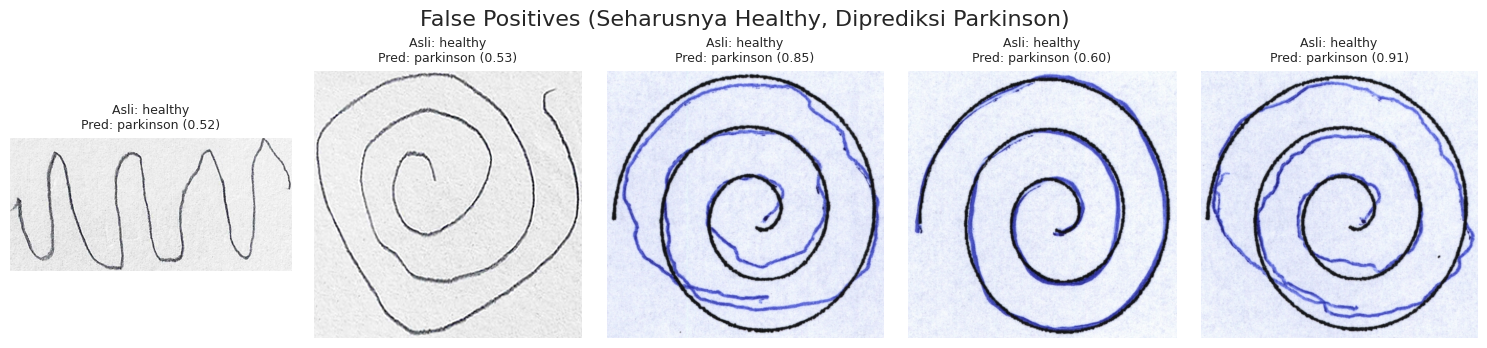


Menampilkan 6 dari 6 gambar false negatives (seharusnya parkinson, diprediksi healthy):


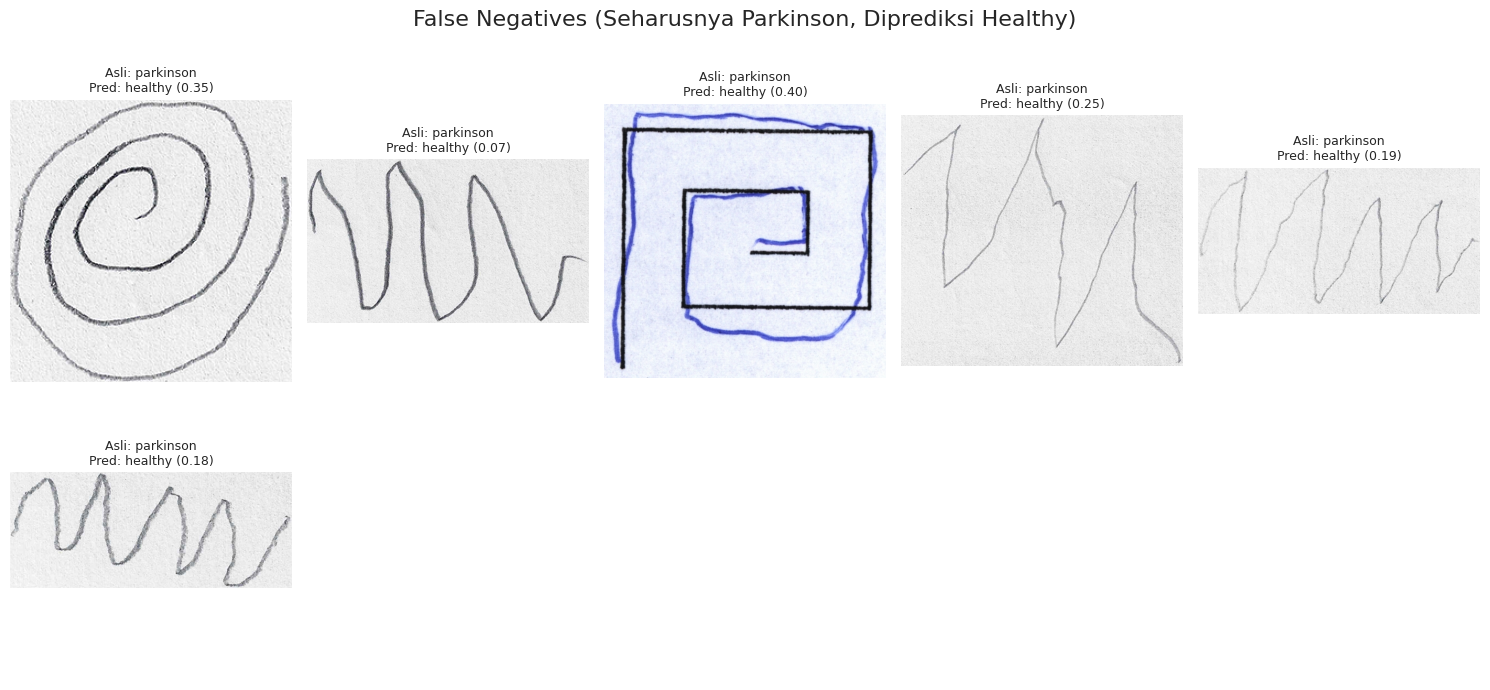


--- Analisis Manual Kesalahan ---
Amati gambar-gambar di atas dan catat observasi Anda mengenai pola kesalahan.


In [22]:
if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None and \
   'test_df' in locals() and not test_df.empty and \
   'class_names_from_tf' in locals() and \
   'IMG_SIZE' in locals() and \
   'is_pyfunc_model_for_final_analysis' in locals(): # Tambahkan pengecekan ini

    # Tentukan sumber model untuk informasi
    if 'run_id_to_load' in locals() and run_id_to_load:
        run_id_info_display = run_id_to_load
    elif 'best_run_id_overall_loop' in locals() and best_run_id_overall_loop:
        run_id_info_display = best_run_id_overall_loop + " (dari loop terakhir)"
    else:
        run_id_info_display = "Model terakhir dari sesi training (tidak ada ID run spesifik)"

    print(f"Melakukan analisis kesalahan dengan model dari Run ID/Sumber: {run_id_info_display}")
    print(f"Model akan diperlakukan sebagai pyfunc: {is_pyfunc_model_for_final_analysis}")


    all_image_paths_analysis = []
    all_true_labels_int_analysis = []
    all_predicted_labels_int_analysis = []
    all_predicted_probs_analysis = []

    for index, row in test_df.iterrows():
        img_path = row['path']
        actual_label_str = row['labels_main']
        try:
            img = image.load_img(img_path, target_size=IMG_SIZE)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_array = image.img_to_array(img)
            img_array_expanded = np.expand_dims(img_array, axis=0)
            # Preprocessing spesifik MobileNetV2 tetap dilakukan sebelum ke model
            img_processed_for_pred = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))

            pred_prob = 0.0 # Inisialisasi
            if is_pyfunc_model_for_final_analysis: # Atau is_pyfunc_model_final tergantung nama variabel Anda
                # Untuk model Keras yang dibungkus pyfunc oleh MLflow,
                # input yang paling mungkin berhasil adalah array NumPy.
                # Konversi EagerTensor ke NumPy array.
                input_data_for_pyfunc = img_processed_for_pred.numpy()

                try:
                    pred_output = model_for_final_analysis.predict(input_data_for_pyfunc)
                    # print(f"Debug: Output pyfunc mentah (setelah input numpy): {pred_output}") # Untuk debug jika perlu

                    # Interpretasi output pyfunc (asumsi sama seperti sebelumnya)
                    if isinstance(pred_output, dict):
                        pred_prob_val = pred_output[list(pred_output.keys())[0]]
                        if isinstance(pred_prob_val, (list, np.ndarray)): pred_prob_val = pred_prob_val[0]
                        pred_prob = float(pred_prob_val)
                    elif isinstance(pred_output, (list, np.ndarray)):
                        pred_prob_val = pred_output[0]
                        if isinstance(pred_prob_val, (list, np.ndarray)): pred_prob_val = pred_prob_val[0]
                        pred_prob = float(pred_prob_val)
                    else:
                        pred_prob = float(pred_output)

                except Exception as e_py_pred:
                    print(f"Error saat prediksi dengan pyfunc (input numpy): {e_py_pred}")
                    # Jika error ini masih terjadi, mungkin ada masalah lebih dalam dengan bagaimana model di-log
                    # atau signature input yang diharapkan oleh wrapper pyfunc.
                    # Anda bisa mencoba memeriksa model_for_final_analysis.metadata.get_input_schema()
                    # untuk melihat apakah ada petunjuk tentang format input yang diharapkan.
                    continue # Lewati gambar ini jika prediksi gagal

            else: # Model Keras biasa (objek tf.keras.Model)
                pred_prob = model_for_final_analysis.predict(img_processed_for_pred, verbose=0)[0][0]
                pred_prob = float(pred_prob)


            predicted_label_int = 1 if pred_prob > 0.5 else 0

            all_image_paths_analysis.append(img_path)
            all_true_labels_int_analysis.append(class_names_from_tf.index(actual_label_str))
            all_predicted_labels_int_analysis.append(predicted_label_int)
            all_predicted_probs_analysis.append(pred_prob)
        except Exception as e:
            print(f"Error memproses {img_path} untuk analisis kesalahan: {e}")
            # Anda bisa memutuskan untuk menambahkan placeholder atau mengabaikan gambar ini
            # agar panjang list tetap konsisten atau menandai sebagai error.

    if not all_image_paths_analysis:
        print("Tidak ada gambar yang berhasil diproses untuk analisis kesalahan.")
    else:
        y_true_analysis_arr = np.array(all_true_labels_int_analysis)
        y_pred_analysis_arr = np.array(all_predicted_labels_int_analysis)
        misclassified_mask = (y_true_analysis_arr != y_pred_analysis_arr)

        if np.any(misclassified_mask):
            misclassified_paths = np.array(all_image_paths_analysis)[misclassified_mask]
            misclassified_true_labels_int = y_true_analysis_arr[misclassified_mask]
            misclassified_pred_probs = np.array(all_predicted_probs_analysis)[misclassified_mask]

            false_positives_paths, false_negatives_paths = [], []
            fp_true_labels_str, fp_pred_probs = [], []
            fn_true_labels_str, fn_pred_probs = [], []

            healthy_idx = class_names_from_tf.index('healthy')
            parkinson_idx = class_names_from_tf.index('parkinson')

            for i in range(len(misclassified_paths)):
                true_label_int = misclassified_true_labels_int[i]
                img_path_err = misclassified_paths[i]
                pred_prob_err = misclassified_pred_probs[i]
                if true_label_int == healthy_idx and pred_prob_err > 0.5:
                    false_positives_paths.append(img_path_err)
                    fp_true_labels_str.append(class_names_from_tf[true_label_int])
                    fp_pred_probs.append(pred_prob_err)
                elif true_label_int == parkinson_idx and pred_prob_err <= 0.5:
                    false_negatives_paths.append(img_path_err)
                    fn_true_labels_str.append(class_names_from_tf[true_label_int])
                    fn_pred_probs.append(pred_prob_err)

            print(f"\nJumlah False Positives (Healthy -> Parkinson): {len(false_positives_paths)}")
            print(f"Jumlah False Negatives (Parkinson -> Healthy): {len(false_negatives_paths)}")

            def display_misclassified_images(image_paths_list_err, actual_labels_str_list_err, predicted_probs_list_err, title_prefix_err, class_names_map_list_err):
                num_images_err = len(image_paths_list_err)
                if num_images_err == 0: print(f"Tidak ada gambar {title_prefix_err.lower()} untuk ditampilkan."); return
                max_display_err = 15
                num_to_display_err = min(num_images_err, max_display_err)
                print(f"\nMenampilkan {num_to_display_err} dari {num_images_err} gambar {title_prefix_err.lower()}:")
                cols_err = 5
                rows_err = (num_to_display_err + cols_err - 1) // cols_err if cols_err > 0 else 0
                if rows_err == 0 and num_to_display_err > 0 : rows_err = 1
                if rows_err == 0: print(f"Tidak ada gambar valid untuk subplot {title_prefix_err.lower()}"); return
                fig_err, axes_err = plt.subplots(rows_err, cols_err, figsize=(cols_err * 3, rows_err * 3.5))
                if num_to_display_err == 1 and rows_err == 1 and cols_err == 1 : axes_err = np.array([axes_err])
                axes_err = axes_err.flatten()
                for i_err in range(num_to_display_err):
                    try:
                        img_err = Image.open(image_paths_list_err[i_err]).convert('RGB')
                        axes_err[i_err].imshow(img_err)
                        pred_label_idx_err = 1 if predicted_probs_list_err[i_err] > 0.5 else 0
                        pred_label_text_err = class_names_map_list_err[pred_label_idx_err]
                        axes_err[i_err].set_title(f"Asli: {actual_labels_str_list_err[i_err]}\nPred: {pred_label_text_err} ({predicted_probs_list_err[i_err]:.2f})", fontsize=9)
                        axes_err[i_err].axis('off')
                    except Exception as e_disp: # Ganti nama variabel error
                        axes_err[i_err].set_title(f"Error: {os.path.basename(image_paths_list_err[i_err])}", fontsize=8)
                        axes_err[i_err].axis('off'); print(f"Gagal menampilkan {image_paths_list_err[i_err]}: {e_disp}")
                for j_err in range(num_to_display_err, len(axes_err)): axes_err[j_err].axis('off')
                fig_err.suptitle(title_prefix_err, fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

            display_misclassified_images(false_positives_paths, fp_true_labels_str, fp_pred_probs,"False Positives (Seharusnya Healthy, Diprediksi Parkinson)", class_names_from_tf)
            display_misclassified_images(false_negatives_paths, fn_true_labels_str, fn_pred_probs,"False Negatives (Seharusnya Parkinson, Diprediksi Healthy)", class_names_from_tf)
            print("\n--- Analisis Manual Kesalahan ---")
            print("Amati gambar-gambar di atas dan catat observasi Anda mengenai pola kesalahan.")
        else:
            print("Tidak ada kesalahan klasifikasi pada test set dengan model ini. Selamat!")
else:
    print("Prasyarat untuk analisis kesalahan tidak terpenuhi.")
    if 'model_for_final_analysis' not in locals() or model_for_final_analysis is None: print(" - Variabel 'model_for_final_analysis' belum terdefinisi atau None.")
    if 'test_df' not in locals() or test_df.empty: print(" - DataFrame 'test_df' kosong atau belum terdefinisi.")
    if 'class_names_from_tf' not in locals(): print(" - Variabel 'class_names_from_tf' belum terdefinisi.")
    if 'IMG_SIZE' not in locals(): print(" - Variabel 'IMG_SIZE' belum terdefinisi.")
    if 'is_pyfunc_model_for_final_analysis' not in locals(): print(" - Variabel 'is_pyfunc_model_for_final_analysis' belum terdefinisi.")

## Tahap 6: Fungsi Prediksi Gambar Tunggal (menggunakan model_for_analysis)

In [23]:
def predict_single_image(img_path, model_to_predict, class_names_map, is_pyfunc, target_size=(224, 224)):
    if model_to_predict is None:
        print("Model belum dilatih atau tidak tersedia untuk prediksi.")
        return None, None
    try:
        img = image.load_img(img_path, target_size=target_size)
        if img.mode != 'RGB': img = img.convert('RGB')
        img_array = image.img_to_array(img)
        img_array_expanded = np.expand_dims(img_array, axis=0)
        # Preprocessing spesifik MobileNetV2 tetap diperlukan sebelum ke model APAPUN (Keras atau Pyfunc Keras)
        img_processed_for_prediction = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))

        # Penyesuaian prediksi berdasarkan jenis model
        if is_pyfunc:
            try:
                pred_output = model_to_predict.predict(img_processed_for_prediction)
            except Exception as e_pyfunc_pred_np_single:
                print(f"Gagal prediksi pyfunc dengan numpy array (single): {e_pyfunc_pred_np_single}. Mencoba dengan DataFrame (flattened)...")
                df_input = pd.DataFrame(img_processed_for_prediction.numpy().reshape(1, -1))
                pred_output = model_to_predict.predict(df_input)

            if isinstance(pred_output, dict):
                pred_prob_single = pred_output[list(pred_output.keys())[0]]
                if isinstance(pred_prob_single, (list, np.ndarray)): pred_prob_single = pred_prob_single[0]
            elif isinstance(pred_output, (list, np.ndarray)):
                pred_prob_single = pred_output[0]
                if isinstance(pred_prob_single, (list, np.ndarray)): pred_prob_single = pred_prob_single[0]
            else:
                pred_prob_single = pred_output
        else: # Model Keras biasa
            pred_prob_single = model_to_predict.predict(img_processed_for_prediction, verbose=0)[0][0]

        predicted_class_index = 1 if float(pred_prob_single) > 0.5 else 0
        label_pred_text = class_names_map[predicted_class_index] if predicted_class_index < len(class_names_map) else "Unknown"

        plt.figure(figsize=(4,4))
        plt.imshow(img); plt.axis('off'); plt.title(f"Prediksi: {label_pred_text} (Skor: {float(pred_prob_single):.2f})")
        plt.show()
        return label_pred_text, float(pred_prob_single)
    except FileNotFoundError: print(f"Error: File gambar tidak ditemukan di {img_path}"); return None, None
    except Exception as e: print(f"Error saat memprediksi gambar {img_path}: {e}"); return None, None

In [24]:
# Contoh Penggunaan (setelah loop training selesai)
if 'model_for_analysis' in locals() and model_for_analysis is not None and \
   'test_df' in locals() and not test_df.empty and \
   'class_names_from_tf' in locals():
    try:
        sample_parkinson_path = test_df[test_df['labels_main'] == 'parkinson']['path'].sample(1, random_state=SEED).iloc[0]
        print("\n--- Contoh Prediksi pada Gambar Parkinson dari Test Set (Model Terbaik) ---")
        if os.path.exists(sample_parkinson_path):
            predict_single_image(sample_parkinson_path, model_for_analysis, class_names_from_tf, is_pyfunc_model)
        else:
            print(f"File tidak ditemukan: {sample_parkinson_path}")
    except (ValueError, IndexError): print("Tidak ada sampel gambar Parkinson di test_df.")
    try:
        sample_healthy_path = test_df[test_df['labels_main'] == 'healthy']['path'].sample(1, random_state=SEED).iloc[0]
        print("\n--- Contoh Prediksi pada Gambar Healthy dari Test Set (Model Terbaik) ---")
        if os.path.exists(sample_healthy_path):
            predict_single_image(sample_healthy_path, model_for_analysis, class_names_from_tf, is_pyfunc_model)
        else:
            print(f"File tidak ditemukan: {sample_healthy_path}")
    except (ValueError, IndexError): print("Tidak ada sampel gambar Healthy di test_df.")
else:
    print("Model terbaik tidak tersedia atau DataFrame test_df kosong, tidak bisa melakukan contoh prediksi.")

Model terbaik tidak tersedia atau DataFrame test_df kosong, tidak bisa melakukan contoh prediksi.


## Tahap 7 : Save Model

In [25]:
# Asumsikan model terbaik Anda disimpan dalam variabel `model_for_final_analysis`
# Pastikan model_for_final_analysis adalah objek model Keras, BUKAN pyfunc wrapper

if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None and not is_pyfunc_model_for_final_analysis:
    save_path_keras = '/content/drive/MyDrive/parkinson/pakde_keras_model.h5' # Ganti path sesuai kebutuhan
    print(f"Menyimpan model Keras ke: {save_path_keras}")
    try:
        model_for_final_analysis.save(save_path_keras)
        print("Model Keras berhasil disimpan.")
    except Exception as e:
        print(f"Gagal menyimpan model Keras: {e}")
else:
    print("Variabel 'model_for_final_analysis' bukan objek model Keras atau tidak ada. Tidak dapat menggunakan model.save().")

# Untuk memuat kembali model:
# from tensorflow.keras.models import load_model
# loaded_model_keras = load_model(save_path_keras)
# print("Model Keras berhasil dimuat kembali.")

Variabel 'model_for_final_analysis' bukan objek model Keras atau tidak ada. Tidak dapat menggunakan model.save().


In [26]:
# Catatan: Menyimpan SELURUH model Keras dengan pickle/joblib TIDAK disarankan.
# Metode ini lebih cocok untuk objek non-Keras seperti scaler, encoder, dll.

import joblib
import pickle
import os

# Contoh Path penyimpanan
save_path_joblib = '/content/drive/MyDrive/parkinson/pakde_model.joblib' # Ganti path
save_path_pickle = '/content/drive/MyDrive/parkinson/pakde_model.pkl' # Ganti path

# Asumsikan Anda memiliki objek Python `my_object_to_save` (misal: list, dict, atau model sklearn sederhana)
# Di sini, kita akan menunjukkan cara menyimpan model Keras, tapi ulangi: INI TIDAK DISARANKAN UNTUK MODEL KERAS.
# Gantikan `model_for_final_analysis` dengan objek yang BENAR-BENAR ingin Anda simpan dengan joblib/pickle.

my_object_to_save = None # Ganti dengan objek yang relevan (misal: class_map atau list class_names)

if 'class_map' in locals():
    my_object_to_save = class_map
    print(f"Menggunakan 'class_map' sebagai contoh objek untuk disimpan.")
elif 'class_names_from_tf' in locals():
    my_object_to_save = class_names_from_tf
    print(f"Menggunakan 'class_names_from_tf' sebagai contoh objek untuk disimpan.")
else:
     print("Tidak ada objek yang jelas (seperti class_map atau class_names_from_tf) untuk contoh simpan.")


if my_object_to_save is not None:
    # --- Menggunakan Joblib ---
    print(f"\nMencoba menyimpan objek menggunakan joblib ke: {save_path_joblib}")
    try:
        joblib.dump(my_object_to_save, save_path_joblib)
        print("Objek berhasil disimpan dengan joblib.")
        # Untuk memuat kembali:
        # loaded_object_joblib = joblib.load(save_path_joblib)
        # print("Objek berhasil dimuat kembali dengan joblib.")
    except Exception as e:
        print(f"Gagal menyimpan objek dengan joblib: {e}")

    # --- Menggunakan Pickle ---
    print(f"\nMencoba menyimpan objek menggunakan pickle ke: {save_path_pickle}")
    try:
        with open(save_path_pickle, 'wb') as f:
            pickle.dump(my_object_to_save, f)
        print("Objek berhasil disimpan dengan pickle.")
        # Untuk memuat kembali:
        # with open(save_path_pickle, 'rb') as f:
        #     loaded_object_pickle = pickle.load(f)
        # print("Objek berhasil dimuat kembali dengan pickle.")
    except Exception as e:
        print(f"Gagal menyimpan objek dengan pickle: {e}")
else:
    print("\nTidak ada objek yang cocok ditemukan untuk contoh penyimpanan dengan joblib/pickle.")

Menggunakan 'class_map' sebagai contoh objek untuk disimpan.

Mencoba menyimpan objek menggunakan joblib ke: /content/drive/MyDrive/parkinson/pakde_model.joblib
Objek berhasil disimpan dengan joblib.

Mencoba menyimpan objek menggunakan pickle ke: /content/drive/MyDrive/parkinson/pakde_model.pkl
Objek berhasil disimpan dengan pickle.


Mounted at /content/drive
Google Drive berhasil dimount.
Mencoba memuat model dari MLflow run ID: 77444d97cfee47f0b883014ad8fd97a7 (runs:/77444d97cfee47f0b883014ad8fd97a7/model)
Gagal memuat model sebagai Keras: 'keras'. Mencoba memuat sebagai pyfunc...
Model berhasil dimuat sebagai pyfunc.

Model berhasil dimuat. Siap untuk prediksi.

Mencoba prediksi untuk gambar: /content/drive/MyDrive/parkinson/split_data/test/parkinson/meander_parkinson_280.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Prediksi Mentah: [[0.82326585]]
Probabilitas Kelas Positif (Parkinson): 0.8233
Kelas Diprediksi: parkinson (Confidence: 0.8233)


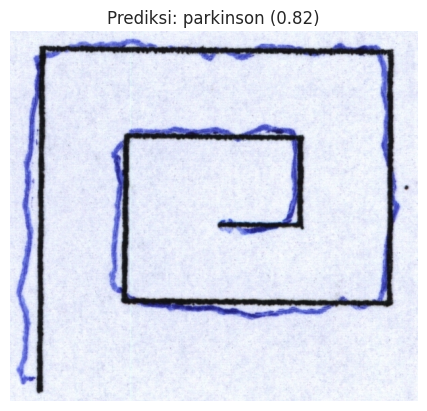

In [27]:
%pip install mlflow tensorflow matplotlib numpy pillow

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image # Import image dari tf.keras.preprocessing
import mlflow
import mlflow.keras
import mlflow.pyfunc
from PIL import Image # Import PIL Image

# Optional: Mount Google Drive jika model disimpan di sana
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive berhasil dimount.")

except Exception as e:
    print(f"Gagal memount Google Drive: {e}")
    print("Asumsikan MLflow tracking log ada di lingkungan Colab saat ini atau bisa diakses.")

# GANTI DENGAN RUN ID MLflow dari model terbaik Anda

MLFLOW_RUN_ID = '77444d97cfee47f0b883014ad8fd97a7' # <-- GANTI INI

# Sesuaikan dengan ukuran gambar yang digunakan saat training
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

model = None
is_pyfunc_model = False

if MLFLOW_RUN_ID == 'PASTE_YOUR_BEST_MLFLOW_RUN_ID_HERE':
    print("PERINGATAN: MLFLOW_RUN_ID belum diganti. Silakan ganti dengan Run ID MLflow yang valid.")
else:
    logged_model_uri = f"runs:/{MLFLOW_RUN_ID}/model"
    print(f"Mencoba memuat model dari MLflow run ID: {MLFLOW_RUN_ID} ({logged_model_uri})")

    try:
        # Coba muat sebagai model Keras
        model = mlflow.keras.load_model(logged_model_uri)
        print("Model berhasil dimuat sebagai model Keras.")
        is_pyfunc_model = False
    except Exception as e_keras:
        print(f"Gagal memuat model sebagai Keras: {e_keras}. Mencoba memuat sebagai pyfunc...")
        try:
            # Jika gagal, coba muat sebagai pyfunc
            model = mlflow.pyfunc.load_model(logged_model_uri)
            print("Model berhasil dimuat sebagai pyfunc.")
            is_pyfunc_model = True
        except Exception as e_pyfunc:
            print(f"Gagal memuat model sebagai pyfunc juga: {e_pyfunc}")
            print("Error: Tidak dapat memuat model dari MLflow Run ID yang diberikan.")
            model = None # Pastikan model None jika gagal total

if model is not None:
    print("\nModel berhasil dimuat. Siap untuk prediksi.")
    if not is_pyfunc_model: # Jika model Keras, tampilkan summary
        try: model.summary()
        except Exception as e: print(f"Gagal menampilkan summary model: {e}")
else:
    print("\nModel tidak berhasil dimuat. Tidak dapat melanjutkan ke prediksi.")

def preprocess_image_for_prediction(img_path, target_size):
    """
    Memuat dan memproses gambar agar sesuai dengan input model.
    Mengikuti langkah preprocessing MobileNetV2.
    """
    try:
        img = image.load_img(img_path, target_size=target_size)
        if img.mode != 'RGB': # Pastikan mode gambar adalah RGB
             img = img.convert('RGB')
        img_array = image.img_to_array(img)
        # Tambahkan dimensi batch
        img_array_expanded = np.expand_dims(img_array, axis=0)
        # Terapkan preprocessing MobileNetV2
        img_processed = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))
        return img_processed
    except Exception as e:
        print(f"Error saat memproses gambar {img_path}: {e}")
        return None

def predict_image(model_obj, processed_image_array, is_pyfunc):
    """
    Melakukan prediksi menggunakan model yang dimuat.
    Menangani model Keras dan pyfunc.
    """
    if model_obj is None or processed_image_array is None:
        print("Model atau gambar yang diproses tidak valid.")
        return None, None

    try:
        if is_pyfunc:

            if tf.is_tensor(processed_image_array):
                 input_data = processed_image_array.numpy()
            else:
                 input_data = processed_image_array

            predictions = model_obj.predict(input_data)

            # Interpretasi output pyfunc - ini mungkin perlu disesuaikan
            # tergantung bagaimana pyfunc wrapper Anda dibuat.
            # Asumsi output adalah probabilitas tunggal untuk kelas positif (Parkinson).
            pred_prob = 0.0
            if isinstance(predictions, dict):
                # Jika output dictionary, ambil nilai pertama
                pred_prob_val = predictions[list(predictions.keys())[0]]
                if isinstance(pred_prob_val, (list, np.ndarray)): pred_prob_val = pred_prob_val[0]
                pred_prob = float(pred_prob_val)
            elif isinstance(predictions, (list, np.ndarray)):
                 # Jika output list/array, ambil elemen pertama
                pred_prob_val = predictions[0]
                if isinstance(pred_prob_val, (list, np.ndarray)): pred_prob_val = pred_prob_val[0]
                pred_prob = float(pred_prob_val)
            else:
                pred_prob = float(predictions)

        else: # Model Keras
            predictions = model_obj.predict(processed_image_array)
            # Output model Keras dengan 1 unit dense + sigmoid adalah array 2D [[probabilitas]]
            pred_prob = predictions[0][0] # Ambil probabilitas

        predicted_class_index = int(pred_prob > 0.5) # 0 untuk Healthy, 1 untuk Parkinson

        class_names = ['healthy', 'parkinson']
        predicted_class_name = class_names[predicted_class_index]

        print(f"\nPrediksi Mentah: {predictions}")
        print(f"Probabilitas Kelas Positif (Parkinson): {pred_prob:.4f}")
        print(f"Kelas Diprediksi: {predicted_class_name} (Confidence: {pred_prob:.4f})")

        return predicted_class_name, pred_prob

    except Exception as e:
        print(f"Error saat melakukan prediksi: {e}")
        return None, None

example_image_path = '/content/drive/MyDrive/parkinson/split_data/test/parkinson/meander_parkinson_280.jpg'

if model is not None:
    if os.path.exists(example_image_path):
        print(f"\nMencoba prediksi untuk gambar: {example_image_path}")

        # 1. Preprocess gambar
        processed_img = preprocess_image_for_prediction(example_image_path, IMG_SIZE)

        if processed_img is not None:
            # 2. Lakukan prediksi
            predicted_label, prediction_probability = predict_image(model, processed_img, is_pyfunc_model)

            # 3. Tampilkan gambar dan hasil prediksi
            if predicted_label is not None:
                 try:
                    img_display = Image.open(example_image_path)
                    plt.imshow(img_display)
                    plt.title(f"Prediksi: {predicted_label} ({prediction_probability:.2f})")
                    plt.axis('off')
                    plt.show()
                 except Exception as e:
                    print(f"Gagal menampilkan gambar: {e}")

        else:
            print("Tidak dapat memproses gambar untuk prediksi.")
    else:
        print(f"File gambar contoh tidak ditemukan: {example_image_path}")
        print("Silakan ganti 'example_image_path' dengan path gambar yang valid.")
else:
    print("Model tidak dimuat, tidak dapat melakukan prediksi.")

In [28]:
import joblib
import os

drive_path = '/content/drive/MyDrive/'
project_folder = 'parkinson'
models_save_folder = 'saved_models'
model_filename = 'best_parkinson_detection_model.joblib'

save_path_base = os.path.join(drive_path, project_folder, models_save_folder)
os.makedirs(save_path_base, exist_ok=True) # Buat folder jika belum ada

final_save_path = os.path.join(save_path_base, model_filename)

model_to_save = None

if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None:
    # Jika model berhasil dimuat untuk analisis kesalahan, gunakan itu
    model_to_save = model_for_final_analysis
    print("Menggunakan model dari tahap analisis kesalahan untuk disimpan.")
elif 'model_best_in_loop' in locals() and model_best_in_loop is not None:
     # Jika tidak, gunakan model terbaik dari loop pelatihan terakhir
    model_to_save = model_best_in_loop
    print("Menggunakan model terbaik dari loop pelatihan terakhir untuk disimpan.")
else:
    print("Tidak ada model yang tersedia untuk disimpan dalam format Joblib/Pickle.")


if model_to_save is not None:
    try:
        # Cara yang lebih baik untuk model Keras adalah menyimpan dalam format Keras native (.h5)
        keras_model_filename_h5 = 'best_parkinson_detection_model.h5'
        keras_save_path_h5 = os.path.join(save_path_base, keras_model_filename_h5)

        print(f"Menyimpan model Keras dalam format HDF5 (.h5) ke: {keras_save_path_h5}")
        model_to_save.save(keras_save_path_h5)
        print("Model Keras berhasil disimpan dalam format .h5")

    except Exception as e:
        print(f"Gagal menyimpan model (Joblib/H5): {e}")
else:
    print("Tidak ada model yang tersedia untuk disimpan.")

Menggunakan model dari tahap analisis kesalahan untuk disimpan.
Menyimpan model Keras dalam format HDF5 (.h5) ke: /content/drive/MyDrive/parkinson/saved_models/best_parkinson_detection_model.h5
Gagal menyimpan model (Joblib/H5): 'PyFuncModel' object has no attribute 'save'


In [29]:
import joblib
import os
import tensorflow as tf # Pastikan TensorFlow diimport jika menggunakan model Keras

# Tentukan path tempat Anda ingin menyimpan model
# Anda bisa menyimpannya di Google Drive agar persisten
drive_path = '/content/drive/MyDrive/' # Pastikan Drive sudah dimount
project_folder = 'parkinson'
models_save_folder = 'saved_models'
model_filename_h5 = 'best_parkinson_detection_model.h5' # Menggunakan ekstensi .h5 untuk Keras
model_filename_joblib = 'best_model_config.joblib' # Contoh jika menyimpan konfigurasi dengan Joblib

save_path_base = os.path.join(drive_path, project_folder, models_save_folder)
os.makedirs(save_path_base, exist_ok=True) # Buat folder jika belum ada

keras_save_path_h5 = os.path.join(save_path_base, model_filename_h5)
joblib_save_path_config = os.path.join(save_path_base, model_filename_joblib)


# Cek apakah ada objek model Keras yang valid untuk disimpan
# model_best_in_loop adalah model Keras dari loop training
# model_for_final_analysis bisa berupa Keras atau PyFunc

model_keras_to_save = None

# Prioritaskan model Keras asli dari loop training jika ada
if 'model_best_in_loop' in locals() and isinstance(model_best_in_loop, tf.keras.Model):
    model_keras_to_save = model_best_in_loop
    print("Menggunakan objek model Keras terbaik dari loop pelatihan untuk disimpan.")
elif 'model_for_final_analysis' in locals() and isinstance(model_for_final_analysis, tf.keras.Model):
    # Jika model_for_final_analysis berhasil dimuat sebagai Keras, gunakan itu
    model_keras_to_save = model_for_final_analysis
    print("Menggunakan objek model Keras yang dimuat untuk analisis kesalahan untuk disimpan.")
else:
    print("Tidak ada objek model Keras murni yang tersedia untuk disimpan dalam format .h5.")
    print("Model terbaik mungkin dimuat sebagai PyFuncModel.")


if model_keras_to_save is not None:
    try:
        # Menyimpan model Keras dalam format HDF5 (.h5)
        print(f"Menyimpan model Keras dalam format HDF5 (.h5) ke: {keras_save_path_h5}")
        model_keras_to_save.save(keras_save_path_h5)
        print("Model Keras berhasil disimpan dalam format .h5")

        # Anda bisa juga menyimpan konfigurasi atau metadata lain dengan Joblib
        # Misalnya, nama kelas
        config_data = {
            "IMG_SIZE": IMG_SIZE,
            "BATCH_SIZE": BATCH_SIZE,
            "class_names": class_names_from_tf if 'class_names_from_tf' in locals() else ['class_0', 'class_1'] # Ambil nama kelas jika ada
        }
        print(f"Menyimpan konfigurasi dengan Joblib ke: {joblib_save_path_config}")
        joblib.dump(config_data, joblib_save_path_config)
        print("Konfigurasi model berhasil disimpan.")

    except Exception as e:
        print(f"Gagal menyimpan model Keras atau konfigurasi: {e}")
else:
    print("Tidak ada model Keras yang valid untuk disimpan.")

Menggunakan objek model Keras terbaik dari loop pelatihan untuk disimpan.
Menyimpan model Keras dalam format HDF5 (.h5) ke: /content/drive/MyDrive/parkinson/saved_models/best_parkinson_detection_model.h5
Model Keras berhasil disimpan dalam format .h5
Menyimpan konfigurasi dengan Joblib ke: /content/drive/MyDrive/parkinson/saved_models/best_model_config.joblib
Konfigurasi model berhasil disimpan.


In [30]:
import joblib
import os
import tensorflow as tf # Diperlukan meskipun menyimpan dengan Joblib jika objeknya Keras

# Tentukan path tempat Anda ingin menyimpan model Joblib
drive_path = '/content/drive/MyDrive/' # Pastikan Drive sudah dimount
project_folder = 'parkinson'
models_save_folder = 'saved_models'
model_filename_joblib = 'best_parkinson_detection_model_joblib.joblib' # Menggunakan ekstensi .joblib

save_path_base = os.path.join(drive_path, project_folder, models_save_folder)
os.makedirs(save_path_base, exist_ok=True) # Buat folder jika belum ada

joblib_save_path = os.path.join(save_path_base, model_filename_joblib)

# Cek apakah ada model yang berhasil dimuat atau dipilih untuk analisis
# model_for_final_analysis adalah variabel dari tahap analisis kesalahan (bisa Keras atau PyFunc)
# model_best_in_loop adalah variabel dari loop pelatihan terakhir (ini Keras)

model_to_save_joblib = None

# Prioritaskan model dari tahap analisis kesalahan jika ada, karena itu yang dianggap "terbaik" oleh MLflow search
if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None:
    model_to_save_joblib = model_for_final_analysis
    print("Menggunakan model dari tahap analisis kesalahan untuk disimpan dengan Joblib.")
elif 'model_best_in_loop' in locals() and model_best_in_loop is not None:
     # Fallback ke model terbaik dari loop pelatihan jika model_for_final_analysis tidak ada/invalid
    model_to_save_joblib = model_best_in_loop
    print("Menggunakan model terbaik dari loop pelatihan terakhir untuk disimpan dengan Joblib.")
else:
    print("Tidak ada model yang tersedia untuk disimpan dalam format Joblib.")


if model_to_save_joblib is not None:
    print(f"Mencoba menyimpan objek model ke: {joblib_save_path}")
    print(f"Tipe objek yang akan disimpan: {type(model_to_save_joblib)}")

    try:
        # Menyimpan objek model menggunakan Joblib
        joblib.dump(model_to_save_joblib, joblib_save_path)
        print("Objek model berhasil disimpan dalam format Joblib.")
        print("PERHATIAN: Memuat kembali model ini mungkin tidak berhasil atau berperilaku seperti yang diharapkan.")

    except Exception as e:
        print(f"Gagal menyimpan objek model dengan Joblib: {e}")
        print("Ini adalah masalah umum saat mencoba menyimpan objek TensorFlow/Keras dengan Joblib.")

else:
    print("Tidak ada model yang valid untuk disimpan.")

Menggunakan model dari tahap analisis kesalahan untuk disimpan dengan Joblib.
Mencoba menyimpan objek model ke: /content/drive/MyDrive/parkinson/saved_models/best_parkinson_detection_model_joblib.joblib
Tipe objek yang akan disimpan: <class 'mlflow.pyfunc.PyFuncModel'>
Objek model berhasil disimpan dalam format Joblib.
PERHATIAN: Memuat kembali model ini mungkin tidak berhasil atau berperilaku seperti yang diharapkan.
